importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 

In [3]:
#reading data sets 
df=pd.read_csv('Iris.csv')

In [4]:
#Check the Iris Dataset
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.info

<bound method DataFrame.info of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-seto

In [8]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Data Exploration & Visualization


Lets start with the Data Exploration

Lets find out how many different Species exist in the dataset and how many different data values each have



In [10]:
class_vals =df['Species'].value_counts()
class_vals

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

Lets Plot out the data and see



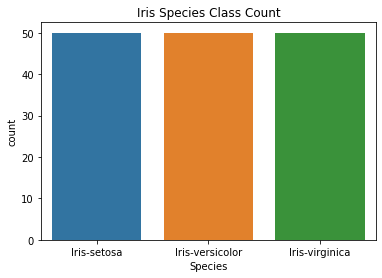

In [11]:
sns.countplot(x='Species', data=df)
plt.title('Iris Species Class Count')
plt.show()

From above we can observe that all the 3 different Species have 50 rows of data. This means our dataset is balanced

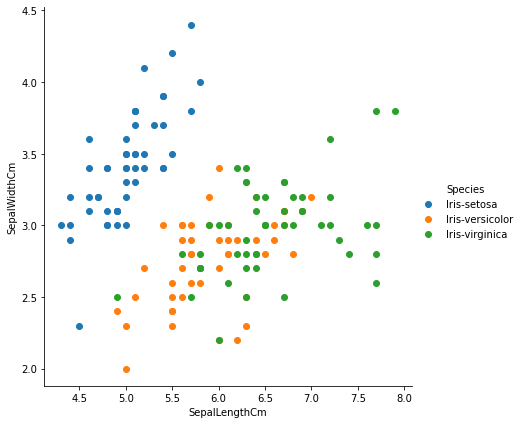

In [12]:
sns.FacetGrid(df, hue='Species', height=6).map(plt.scatter,'SepalLengthCm','SepalWidthCm').add_legend()
plt.show()

Obersvations from above plot:

1.Iris-Setosa - has the maximum Speal Width

2.Iris-Virginca - has the maximum Speal Length

3.Iris-Versicolor - falls in the middle of the other 2 species

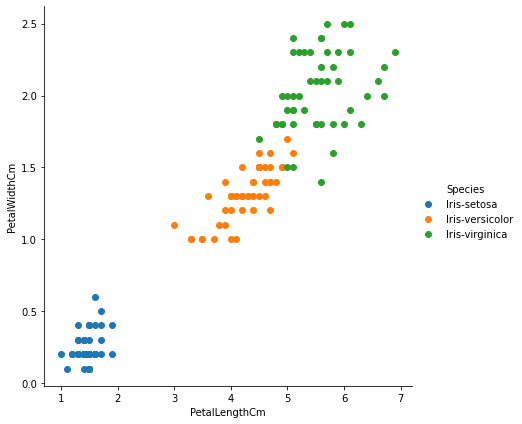

In [14]:
sns.FacetGrid(df, hue='Species', height=6).map(plt.scatter,'PetalLengthCm','PetalWidthCm').add_legend()
plt.show()

Obersvations from above plot:

1.Iris-Setosa - has the minimum Petal Width & Petal Length

2.Iris-Virginca - has the maximum Petal Width & Petal Length

3.Iris-Versicolor - falls in the middle of the other 2 species

We can observe the same with the box plots separately for each feature of these flowers¶


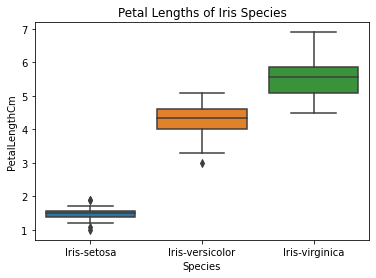

In [15]:
sns.boxplot(y='PetalLengthCm',x='Species',data=df)
plt.title('Petal Lengths of Iris Species')
plt.show()

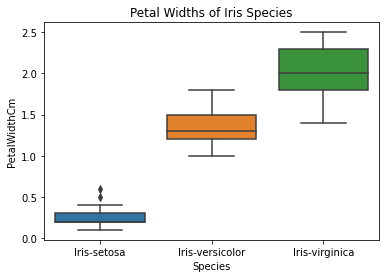

In [16]:
sns.boxplot(y='PetalWidthCm',x='Species',data=df)
plt.title('Petal Widths of Iris Species')
plt.show()

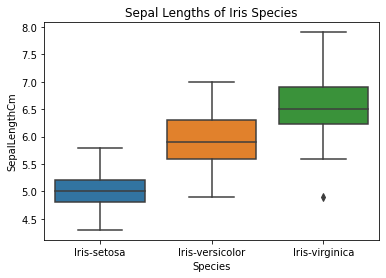

In [17]:
sns.boxplot(y='SepalLengthCm',x='Species',data=df)
plt.title('Sepal Lengths of Iris Species')
plt.show()

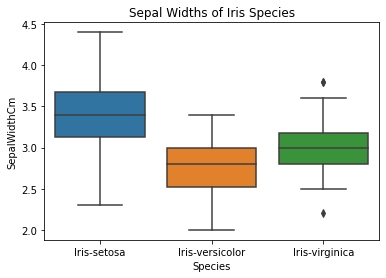

In [18]:
sns.boxplot(y='SepalWidthCm',x='Species',data=df)
plt.title('Sepal Widths of Iris Species')
plt.show()

Heatmap plot


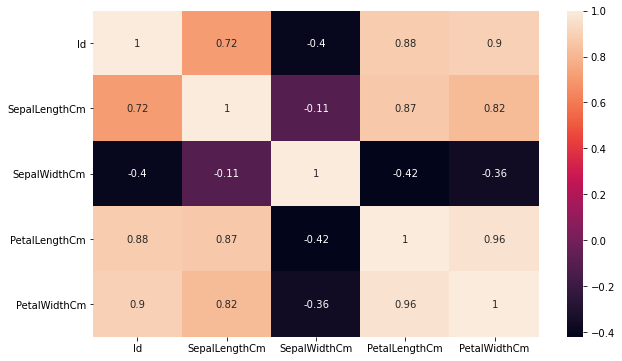

In [19]:
corr=df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)
plt.show()

Obersvations from above plot:

1.Sepal Length and Sepal Width are negatively i.e. they are not closely related to each other

2.Petal Length and Petal Width are highly correlated.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

### Splitting Input and Targets


In [22]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

In [24]:
y = df['Species']

Splitting Dataset into Train/Test set


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Gaussian Naive Bayes Classifier

In [26]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print('accuracy is ', accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy is  1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



### KNeighborsClassifier Classifier


In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
y_pred = knn.fit(X_train, y_train).predict(X_test)
print('accuracy is ', accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy is  0.9777777777777777
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



### Logistic Regression Classifier


In [28]:
from sklearn.linear_model import LogisticRegression

LR=LogisticRegression()
y_pred = LR.fit(X_train, y_train).predict(X_test)
print('accuracy is ', accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy is  0.9777777777777777
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



### Support Vector Machine Classifier


In [29]:
from sklearn.svm import SVC

svc=SVC()
y_pred = svc.fit(X_train, y_train).predict(X_test)
print('accuracy is ', accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy is  0.9777777777777777
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



### RandomForest Classifier


In [30]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
y_pred = rf.fit(X_train, y_train).predict(X_test)
print('accuracy is ', accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy is  0.9777777777777777
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [31]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
y_pred = dt.fit(X_train, y_train).predict(X_test)
print('accuracy is ', accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy is  0.9777777777777777
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



From above we can conclude that Gaussian Naive Bayes is the best Classifier for Iris Dataset